## Loan Data Exploration

### Preliminary Wrangling
This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import Day

%matplotlib inline



In [2]:
#to display max rows and columns
from IPython.display import display

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [3]:
# load in the dataset into a pandas dataframe, print statistics
loan_df = pd.read_csv('prosperLoanData.csv')

#### * high-level overview of data shape and composition


In [4]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# shape of the dataset -> the dataset contains 81 columns and 113937 records
loan_df.shape

(113937, 81)

In [6]:
loan_df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [7]:
# descriptive statistics for numeric variables
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
#check null values
loan_df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
# check duplication 
loan_df['ListingKey'].duplicated().sum()

871

In [10]:
loan_df['LoanKey'].duplicated().sum()

871

#### 1)  What is the structure of Data?
- The data consist of a total 81 attributes and accounts for 113,937 entries. Each entry gives us idea about the borrower and it's background and the details of the loan associated with them.

#### 2) What is/are the main feature(s) of interest in your dataset?

Below the subset of important feachers has been choosen. Some of the important features are Borrower APR,Prosper Rating, Occupation, Employment Status. I have dropped duplicated rows based on listing number.
ListingCreationDate was converted to datetime and then year and month extacted into new columns.
Rows without ProsperRating has been removed.Missing values for the Occupation has been filled as unknown.

#### 3) What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the Loan Original Amount will have a negative effect on the Borrower APR(Anual Percentage Rate) because with the increase of loan amount I expect APR to get lower. I suspect that the employment status, occupation and monthly income will have an effect on the Borrower APR. These characteristics will aslo affect Loan Amount and Prosper Rating.

### Data Cleaning

In [11]:
# Subset the dataframe by selecting features of interest
cols = ['ListingNumber',
'ListingCreationDate',
'Term',
'LoanStatus',
'BorrowerAPR',
'BorrowerRate',
'ListingCategory (numeric)',
'BorrowerState',
'Occupation',
'EmploymentStatus',
'InquiriesLast6Months',
'TotalInquiries',
'IncomeRange',
'IncomeVerifiable',
'StatedMonthlyIncome',
'LoanNumber',
'LoanOriginalAmount',
'LoanOriginationDate',
'MonthlyLoanPayment',
'Investors',
'ProsperRating (Alpha)',
       'ProsperScore' ]
loan_df_copy = loan_df.copy()
sub_loan_df = loan_df_copy[cols]

In [12]:
# display information about the subdataset
sub_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   BorrowerState              108422 non-null  object 
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  InquiriesLast6Months       113240 non-null  float64
 11  TotalInquiries             112778 non-null  float64
 12  IncomeRange                113937 non-null  object 
 13  IncomeVerifiable           11

In [13]:
#display the dataset
sub_loan_df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,InquiriesLast6Months,TotalInquiries,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,ProsperRating (Alpha),ProsperScore
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,3.0,3.0,"$25,000-49,999",True,3083.333333,19141,9425,2007-09-12 00:00:00,330.43,258,NaN,NaN
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,2,CO,Professional,Employed,3.0,5.0,"$50,000-74,999",True,6125.000000,134815,10000,2014-03-03 00:00:00,318.93,1,A,7.0
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0,GA,Other,Not available,0.0,1.0,Not displayed,True,2083.333333,6466,3001,2007-01-17 00:00:00,123.32,41,NaN,NaN
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,0.0,1.0,"$25,000-49,999",True,2875.000000,77296,10000,2012-11-01 00:00:00,321.45,158,A,9.0
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,2,MN,Executive,Employed,1.0,9.0,"$100,000+",True,9583.333333,102670,15000,2013-09-20 00:00:00,563.97,20,D,4.0


#### - Check for duplicates and drop duplicate

In [14]:
# check for duplication 
sub_loan_df['ListingNumber'].duplicated().sum()

871

In [15]:
#drop the duplicates
sub_loan_df = sub_loan_df.drop_duplicates(subset='ListingNumber')

In [16]:
sub_loan_df['ListingNumber'].duplicated().sum()

0

#### - Cope with the Null values

In [17]:
sub_loan_df.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3529
EmploymentStatus              2255
InquiriesLast6Months           697
TotalInquiries                1159
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
LoanNumber                       0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
Investors                        0
ProsperRating (Alpha)        29084
ProsperScore                 29084
dtype: int64

In [18]:
sub_loan_df= sub_loan_df[sub_loan_df['ProsperScore'].notnull()]

In [19]:
sub_loan_df.isnull().sum()

ListingNumber                   0
ListingCreationDate             0
Term                            0
LoanStatus                      0
BorrowerAPR                     0
BorrowerRate                    0
ListingCategory (numeric)       0
BorrowerState                   0
Occupation                   1274
EmploymentStatus                0
InquiriesLast6Months            0
TotalInquiries                  0
IncomeRange                     0
IncomeVerifiable                0
StatedMonthlyIncome             0
LoanNumber                      0
LoanOriginalAmount              0
LoanOriginationDate             0
MonthlyLoanPayment              0
Investors                       0
ProsperRating (Alpha)           0
ProsperScore                    0
dtype: int64

In [20]:
#list unique values of Occupation column
sub_loan_df.Occupation.unique()

array(['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Other', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', nan, 'Teacher', 'Clergy', 'Attorney', 'Nurse (RN)',
       'Accountant/CPA', 'Analyst', 'Investor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Truck Driver',
       'Administrative Assistant', 'Police Officer/Correction Officer',
       'Social Worker', 'Food Service Management', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping', 'Bus Driver',
       'Engineer - Chemical', 'Doctor', 'Chemist', "Teacher's Aide",
       'Pilot - Private/Commercial', "Nurse's Aide", 'Religious',
     

In [21]:
# filling missing values for the Occupation as unknown
sub_loan_df.Occupation = sub_loan_df.Occupation.fillna('Unknown')

In [22]:
sub_loan_df.isnull().sum()

ListingNumber                0
ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
InquiriesLast6Months         0
TotalInquiries               0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
LoanNumber                   0
LoanOriginalAmount           0
LoanOriginationDate          0
MonthlyLoanPayment           0
Investors                    0
ProsperRating (Alpha)        0
ProsperScore                 0
dtype: int64

In [23]:
#list unique values of BorrowerState column
sub_loan_df.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ', 'VA',
       'FL', 'PA', 'OR', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA', 'MI', 'NV',
       'NJ', 'TX', 'AR', 'SC', 'DE', 'UT', 'DC', 'MA', 'MO', 'CT', 'IN',
       'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'HI', 'NH', 'NE', 'WY',
       'AK', 'MT', 'VT', 'SD'], dtype=object)

In [24]:
#list unique values of BorrowerState column
sub_loan_df.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

#### - Data type change

In [25]:
#list unique values of TotalInquiries column
sub_loan_df.TotalInquiries.unique()

array([ 5.,  1.,  9.,  2.,  0., 16.,  6.,  4.,  3., 10.,  8., 12., 11.,
       17.,  7., 13., 34., 19., 14., 18., 25., 21., 15., 20., 22., 27.,
       24., 23., 26., 29., 28., 35., 32., 41., 74., 31., 42., 30., 40.,
       36., 78., 51., 46., 33., 39., 38., 45., 44., 43., 66., 50., 37.,
       63., 71.])

In [26]:
# converting datatypes of the TotalInquiries column
sub_loan_df.TotalInquiries = sub_loan_df.TotalInquiries.astype(int)

In [27]:
#change the sListingCreationDate and LoanOriginationDate  to date
sub_loan_df['ListingCreationDate'] = pd.to_datetime(sub_loan_df['ListingCreationDate'], format= "%Y-%m-%d %H:%M:%S")
sub_loan_df['LoanOriginationDate'] = pd.to_datetime(sub_loan_df['LoanOriginationDate'], format= "%Y-%m-%d %H:%M:%S")

In [28]:
sub_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingNumber              83982 non-null  int64         
 1   ListingCreationDate        83982 non-null  datetime64[ns]
 2   Term                       83982 non-null  int64         
 3   LoanStatus                 83982 non-null  object        
 4   BorrowerAPR                83982 non-null  float64       
 5   BorrowerRate               83982 non-null  float64       
 6   ListingCategory (numeric)  83982 non-null  int64         
 7   BorrowerState              83982 non-null  object        
 8   Occupation                 83982 non-null  object        
 9   EmploymentStatus           83982 non-null  object        
 10  InquiriesLast6Months       83982 non-null  float64       
 11  TotalInquiries             83982 non-null  int64         
 12  Inc

In [29]:
#display the dataset
sub_loan_df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,InquiriesLast6Months,TotalInquiries,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,ProsperRating (Alpha),ProsperScore
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,2,CO,Professional,Employed,3.0,5,"$50,000-74,999",True,6125.000000,134815,10000,2014-03-03,318.93,1,A,7.0
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,0.0,1,"$25,000-49,999",True,2875.000000,77296,10000,2012-11-01,321.45,158,A,9.0
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,2,MN,Executive,Employed,1.0,9,"$100,000+",True,9583.333333,102670,15000,2013-09-20,563.97,20,D,4.0
5,1074836,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,1,NM,Professional,Employed,0.0,2,"$100,000+",True,8333.333333,123257,15000,2013-12-24,342.37,1,B,10.0
6,750899,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,1,KS,Sales - Retail,Employed,0.0,0,"$25,000-49,999",True,2083.333333,88353,3000,2013-04-18,122.67,1,E,2.0


### Univariate Exploration

* Plot the distribution of Borrower APR mean value:

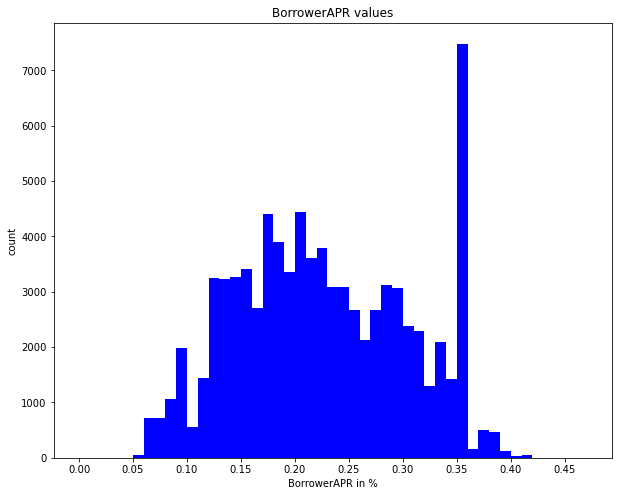

In [30]:
bins = np.arange(0, sub_loan_df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[10, 8])

plt.hist(data = sub_loan_df, x = 'BorrowerAPR', bins = bins, color = 'Blue');
plt.title('BorrowerAPR values')
plt.xlabel('BorrowerAPR in %')
plt.ylabel('count')
plt.xticks(np.arange(0, sub_loan_df['BorrowerAPR'].max()+0.05, 0.05));

BorrowerAPR distribution seems fairly normal  with an exception of very high peak around ~0.35.

* Plot the distribution of Monthly Income:

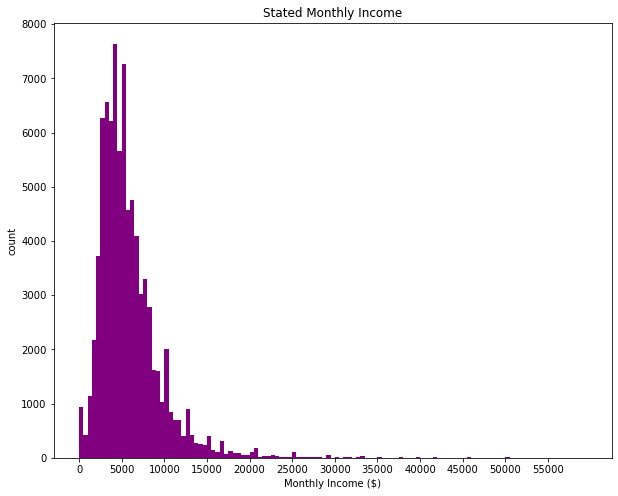

In [31]:
bins_mi = np.arange(0, 60000, 500)
plt.figure(figsize=[10, 8])

plt.hist(data = sub_loan_df, x = 'StatedMonthlyIncome', bins=bins_mi, color = 'Purple');
plt.title('Stated Monthly Income')
plt.xlabel('Monthly Income ($)')
plt.ylabel('count')

plt.xticks(np.arange(0, 60000, 5000));

The distribution of Stated Monthly Income is right skewed. The peak is around 6K. More of the monthly incomes are less than 30K except some outliers around 50K which should be removed 

In [32]:
sub_loan_df = sub_loan_df[sub_loan_df.StatedMonthlyIncome<30000]

* Plot the distribution of Loan Original Amount:

Text(0, 0.5, 'count')

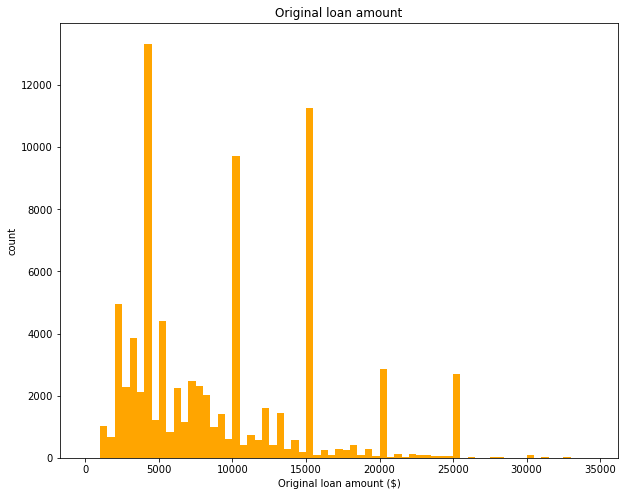

In [33]:
bins_la = np.arange(0, 35000, 500)
plt.figure(figsize=[10, 8])

plt.hist(data = sub_loan_df, x = 'LoanOriginalAmount', bins=bins_la, color= 'Orange');
plt.title('Original loan amount')
plt.xlabel('Original loan amount ($)');
plt.ylabel('count')

The very large spikes in frequency 5K, 10K, 15K, 20K, 25K. It means that most of the loans are multiples of 5k.

* What Prosper scored occurs the most?

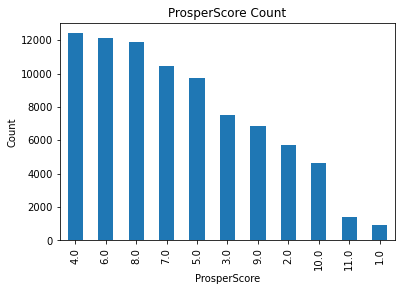

In [34]:
# see which ProsperScore borrowers received the most

sub_loan_df['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.fontsize = 10
plt.figsize=(14,14);

After inspecting the Prosper Score we can say that the Prosper Score decrease with the amount of borrowed money.

 * Explore the mean values of ProsperScore by each occupation

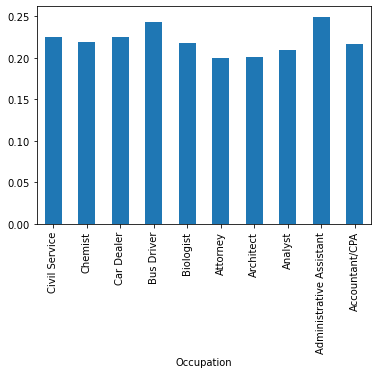

In [35]:
# bar plot for APR means of top 10 occupations.

top_10 = sub_loan_df.groupby('Occupation').BorrowerAPR.mean()[9::-1]
top_10.plot(kind='bar');

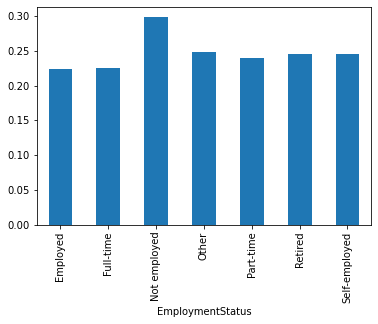

In [36]:
# bar plot for APR means of employment status.

top_10 = sub_loan_df.groupby('EmploymentStatus').BorrowerAPR.mean()
top_10.plot(kind='bar');

Occupation and Employment Status are not affected significantly the Borrower ARR

* Number of loans by categories (Employment Status, Occupation and Prosper Rate)

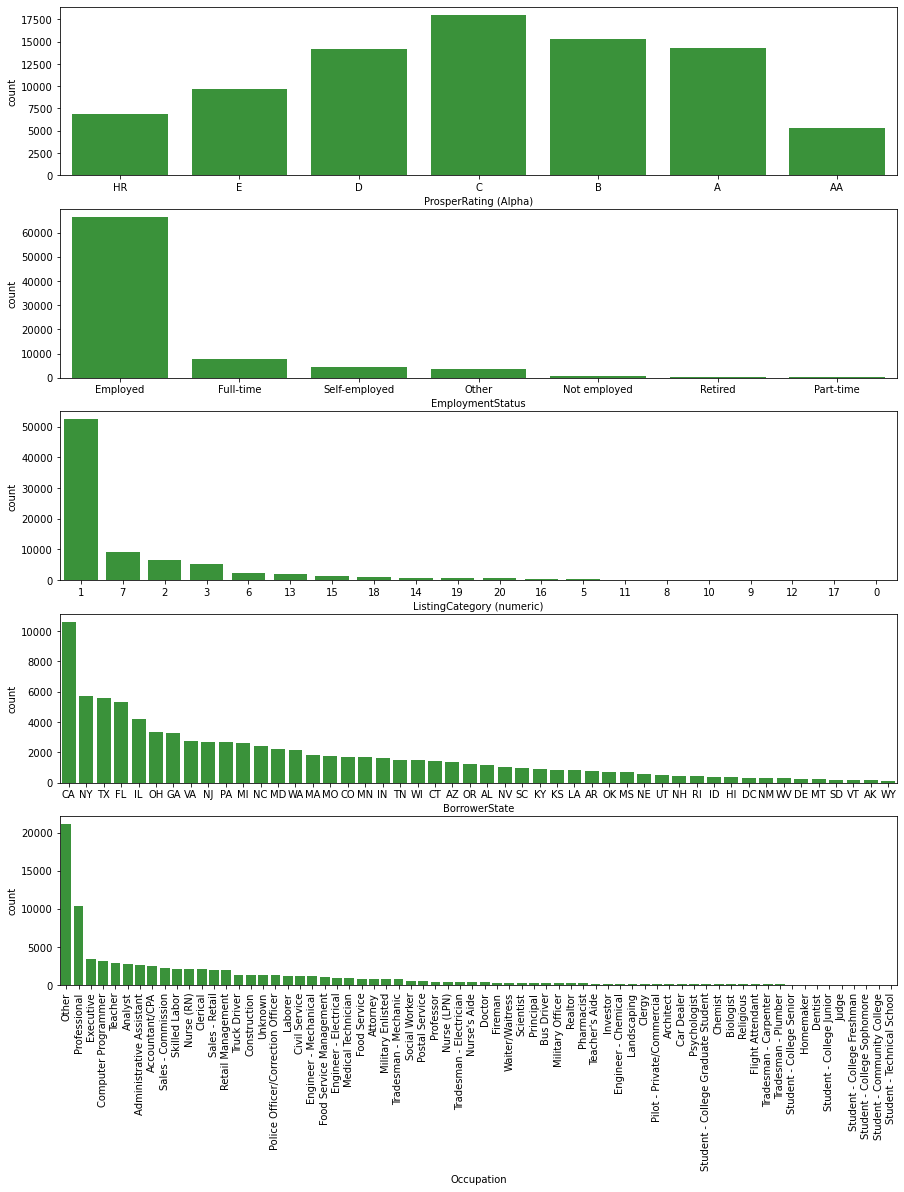

In [37]:

fig, ax = plt.subplots(nrows=5, figsize = [15,18])
default_color = sns.color_palette()[2]

# seaborn countplot Prosper Rating
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)

sub_loan_df['ProsperRating (Alpha)'] = sub_loan_df['ProsperRating (Alpha)'].astype(ordered_var)

sns.countplot(data = sub_loan_df, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0]);

# seaborn countplot Employment Status
sns.countplot(data = sub_loan_df, x = 'EmploymentStatus', color = default_color, ax = ax[1],
            order = sub_loan_df['EmploymentStatus'].value_counts().index);

#seaborn countplot ListingCategory (numeric)
sns.countplot(data = sub_loan_df, x = 'ListingCategory (numeric)', color = default_color, ax = ax[2],
           order = sub_loan_df['ListingCategory (numeric)'].value_counts().index);


#seaborn countplot ListingCategory (numeric)
sns.countplot(data = sub_loan_df, x = 'BorrowerState', color = default_color, ax = ax[3],
           order = sub_loan_df['BorrowerState'].value_counts().index);

# seaborn countplot Occupation
sns.countplot(data = sub_loan_df, x = 'Occupation', color = default_color, ax = ax[4],
           order = sub_loan_df['Occupation'].value_counts().index);
plt.xticks(rotation=90);


Students are the least of the borrowers. Most of the borrowers are employed. The ratings of most of the borrowers are from C rating. Most of the loands are into 1st category - Debt Consolidation. Most of the borrowers are from California ,New York or Texas.

* **Distribution of loans listed by year and month**

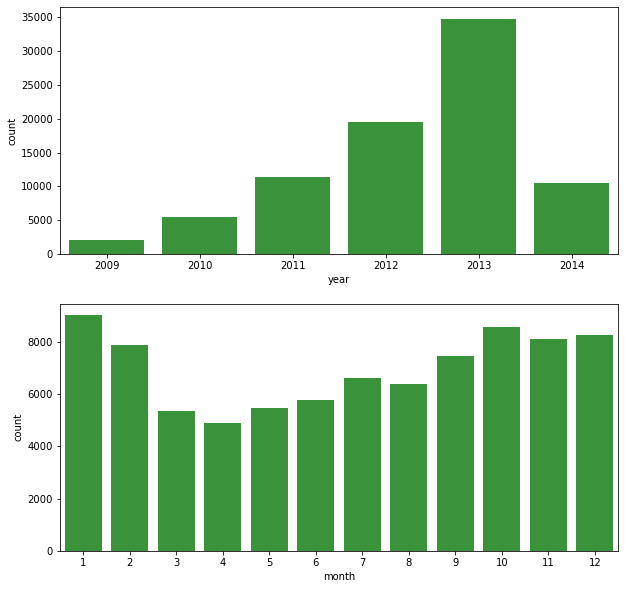

In [38]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
default_color = sns.color_palette()[2]
sub_loan_df['year'] = pd.DatetimeIndex(sub_loan_df['ListingCreationDate']).year
sub_loan_df['month'] = pd.DatetimeIndex(sub_loan_df['ListingCreationDate']).month
sns.countplot(data = sub_loan_df, x = 'year', color = default_color, ax = ax[0]);
sns.countplot(data = sub_loan_df, x = 'month', color = default_color, ax = ax[1]);

There is an upper trend in loans listing yeach passing year. The year with the maximum loans is 2013 year. January is the month with the highest number of loan swhereas April is the month with the least number of loans listed.

### Bivariate Exploration

* **Heatmap chart to show the correlation between numeric variales and categories in the data**

In [39]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','MonthlyLoanPayment','ProsperScore']
cat_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus']

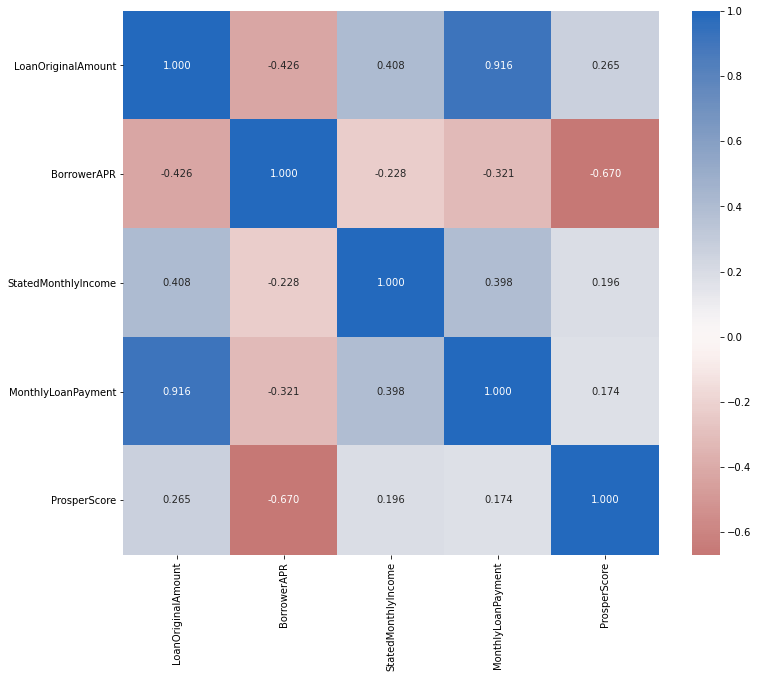

In [40]:

plt.figure(figsize = [12, 10])
sns.heatmap(sub_loan_df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);


The correlations are postive and negative. The highest negative correlation is '-0.670' between 'ProsperScore' and 'BorrowerAPR', which should be true because higher the prosperscore, higher will be the trust in customer and his ability to repay the dues hence they are inversely proportional or negatively correlated. The highest positive corelation is '0.916' between 'Loan Original Amount' and 'Monthly Loan Payment' which should be true because with the higher loan amount the monthly loan payment will be also higher.

* **Scatter plots for the same variables**

<Figure size 720x720 with 0 Axes>

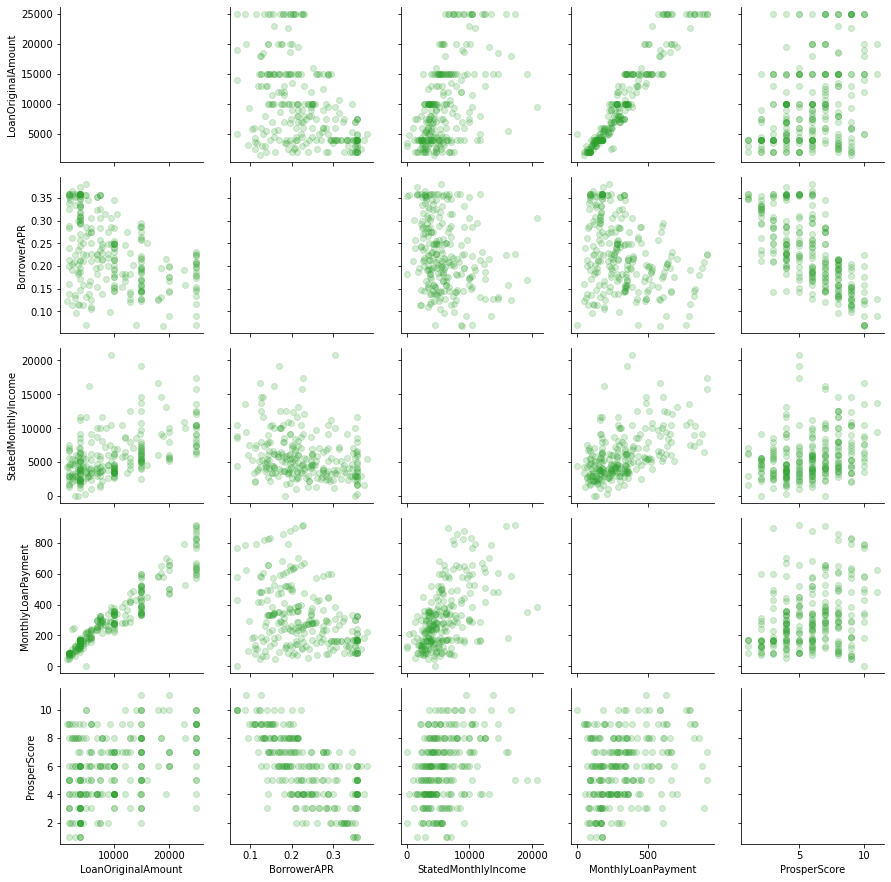

In [41]:
# plot matrix: only 250 random loans are used to see the pattern more clearer
plt.figure(figsize = [10, 10]) 

default_color = sns.color_palette()[2]


sample = np.random.choice(sub_loan_df.shape[0], 250, replace = False)
loan_samp = sub_loan_df.iloc[sample,:]

g = sns.PairGrid(data = loan_samp, vars = num_vars)
g.map_offdiag(plt.scatter, alpha=0.2, color= default_color)

The scatter plot also turns out to have similar correlations as in the heatmap.
The  correlation coefficient of borrower APR and loan original amount is -0.426( noticed from the heatmap), the scatter plot also shows that these two variables are negatively correlated,following that the more the loan amount is, the lower the APR. The negative corelation between 'ProsperScore' and 'BorrowerAPR' and the positive correlation between 'Loan Original Amount' and 'Monthly Loan Payment' are also shown in scaterplot.

* **Plot Matrix of numeric features against categorical features**

In [42]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[2]
    sns.boxplot(x=x, y=y, color = default_color)

<Figure size 720x720 with 0 Axes>

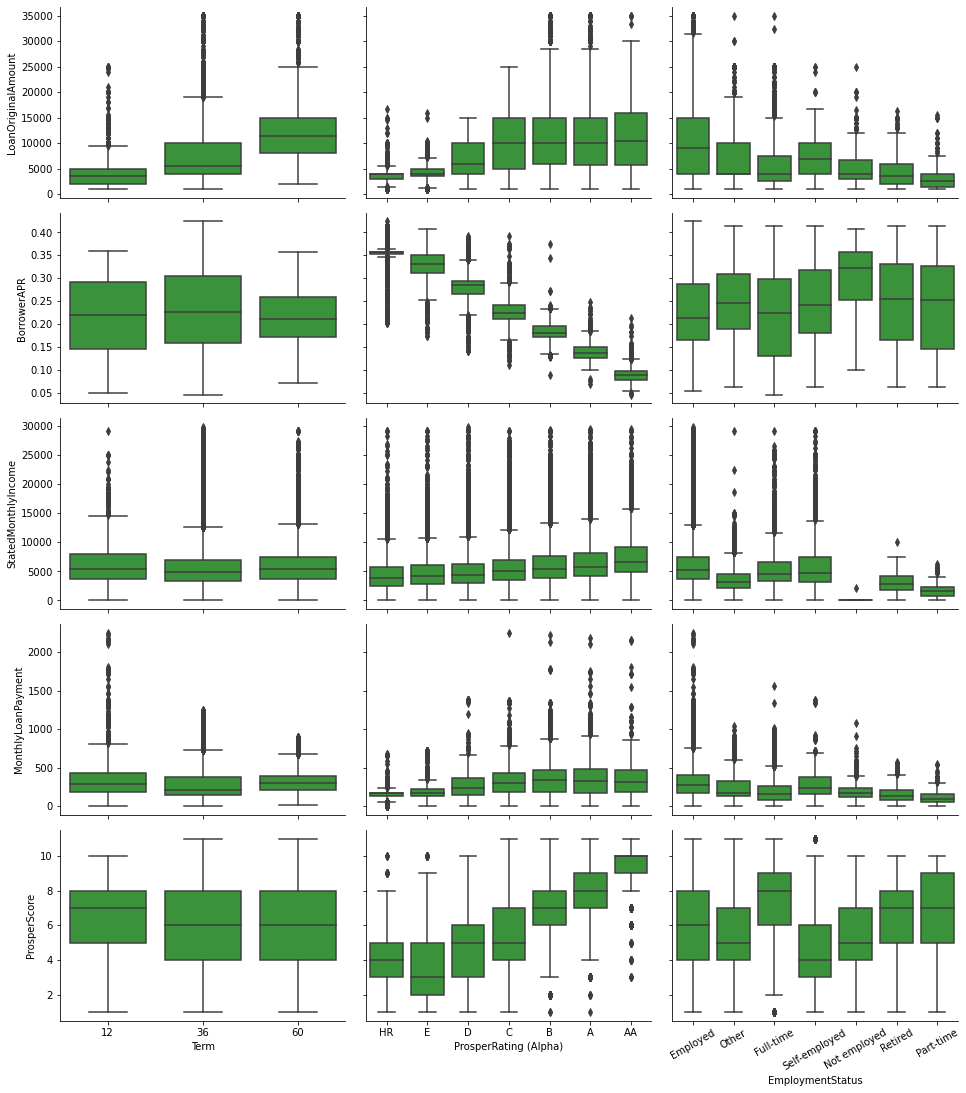

In [43]:
# plot numeric features against Term Prosper Rating and Employment Status
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = sub_loan_df, y_vars = num_vars, 
                x_vars =cat_vars, height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that:<br> 
    1. The loan amount inceases with increse of loan term.<br> 
    2. Borrower APR decreases with the better Prosper rating.It means that the Prosper rating has a strong effect on borrower APR.<br> 
    3. Monthly income , loan amount and monthly loan payment slightly increase with the better Prosper rating.<br> 
    4.Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

* Plot the correlation between Borrower APR and Occupation and Borrower APR by Borrower State

<Figure size 1440x1440 with 0 Axes>

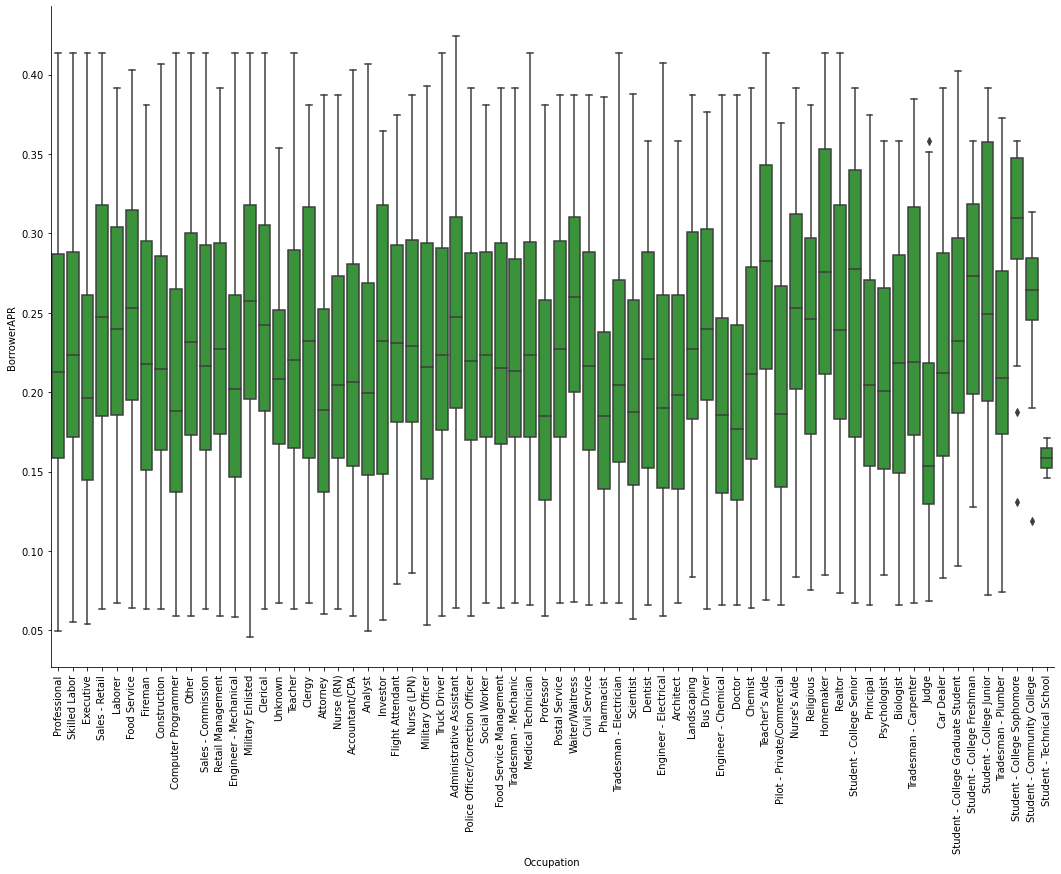

In [44]:
#Borrower APR by Occupation
plt.figure(figsize = [20,20])
g = sns.PairGrid(data = sub_loan_df, y_vars = ['BorrowerAPR'], 
                x_vars = ['Occupation'] , height = 10, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

The borrower APR changes with the occupation. Junior Students having highest Borrower APR and judges having lowest.

<Figure size 1440x1440 with 0 Axes>

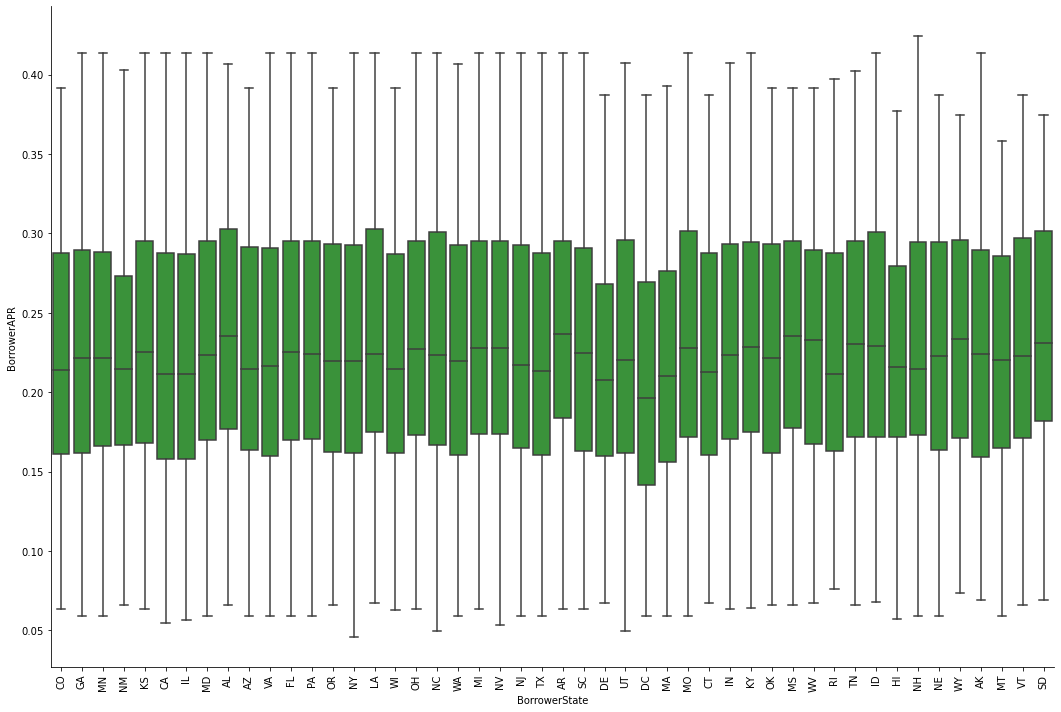

In [45]:
#Borrower APR by Borrower State
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = sub_loan_df, y_vars = ['BorrowerAPR'], 
                x_vars = ['BorrowerState'] , height = 10, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

Borrower APR are almost the same between the states

* **Plot only correlation between Borrower APR and Prosper Score using heatmap and scatter plot**

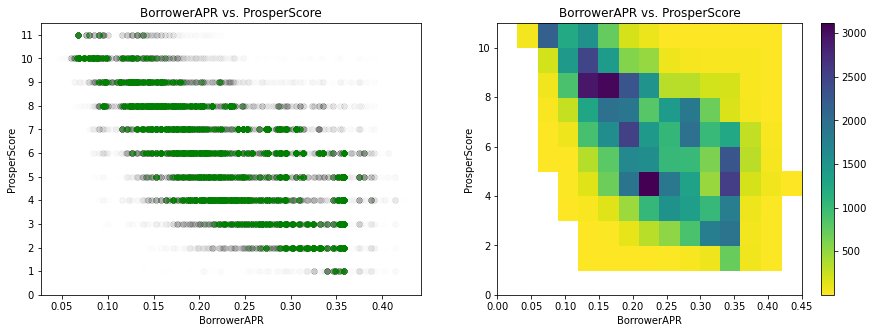

In [46]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = sub_loan_df, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005, color = 'Green')
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, sub_loan_df['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, sub_loan_df['ProsperScore'].max()+1, 1)
plt.hist2d(data = sub_loan_df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

Confirming the assumtion that Prosper Score and Borrower APR are Negatively correlated.

* **Relation between BorrowerAPR and ProsperScore & ProsperRating**

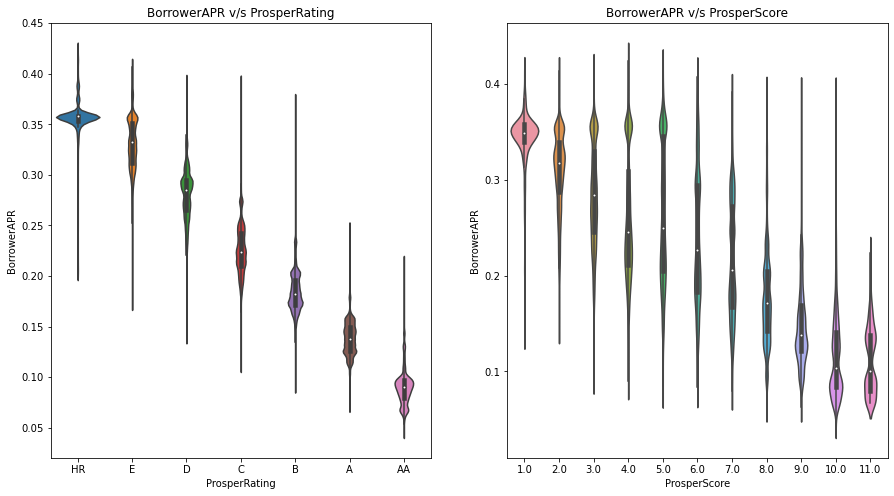

In [47]:
#violin plot for further investigation
plt.figure(figsize = [20, 10]) 

plt.subplot(1, 2, 1)
sns.violinplot(data = sub_loan_df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(15, 8)
plt.title('BorrowerAPR v/s ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sns.violinplot(data = sub_loan_df, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(15, 8)
plt.title('BorrowerAPR v/s ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

The violin plot also shows that the Borrower APR decrease with higher Prosper rating. ProsperScore plot clearly shows a negative correlation with the BorrowerAPR.

### Multivariate Exploration

* **Prosper Rating Effect on Relationship between APR and Loan Amount**

The borrower APR decreases with better rating and the loan amount increases with better rating.  The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better.

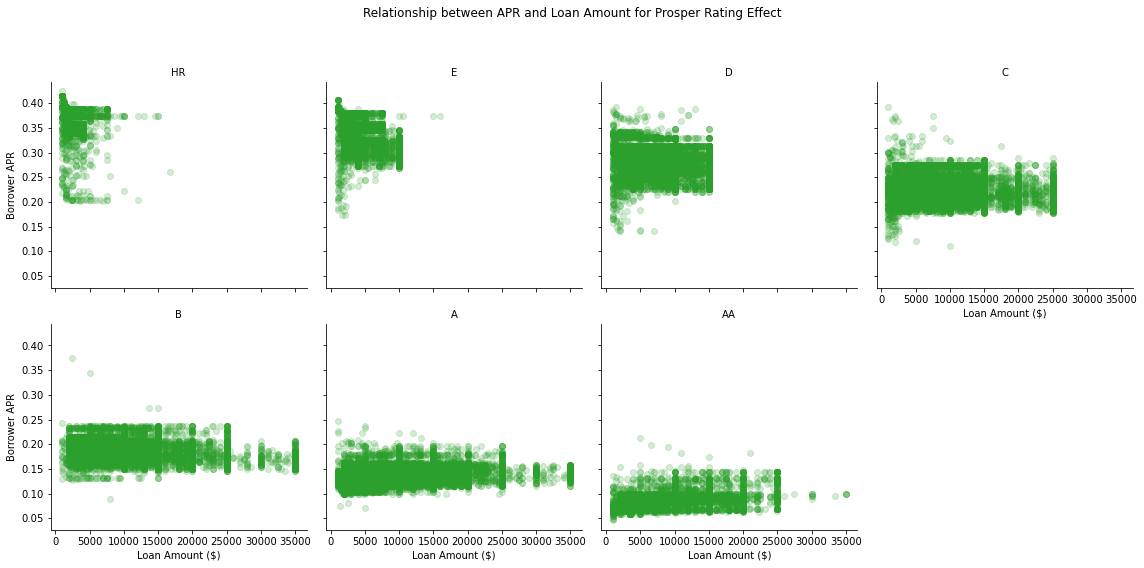

In [48]:
default_color = sns.color_palette()[2]
g=sns.FacetGrid(data=sub_loan_df,col='ProsperRating (Alpha)', height=4, col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR',alpha=0.2, color = default_color)
g.set_titles('{col_name}')

g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Relationship between APR and Loan Amount for Prosper Rating Effect');
plt.subplots_adjust(top=0.85)

* **Borrower APR, Monthly Income and Loan Amount by Prosper Rating and Term**

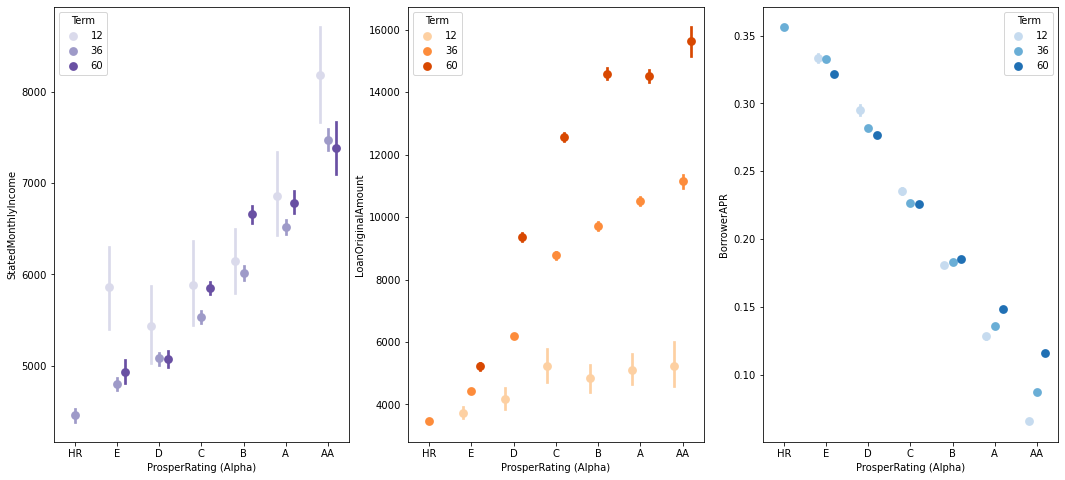

In [49]:
fig, ax = plt.subplots(ncols=3, figsize=[18,8])
sns.pointplot(data = sub_loan_df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sns.pointplot(data = sub_loan_df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Oranges', linestyles = '', dodge = 0.4, ax=ax[1]);
sns.pointplot(data = sub_loan_df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[2]);

1.There is no interaction effect between term and rating for Monthly Income.The pattern of term is similar among different ratings.With better prosper rating the Monthly Income also increases.<br>
2.There is an interaction between term and rating for Loan Original Amount. With better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.<br>
3. There is no interaction between term and rating for Borrower APR.With better prosper rating the Borrower APR of all three terms decreases. 

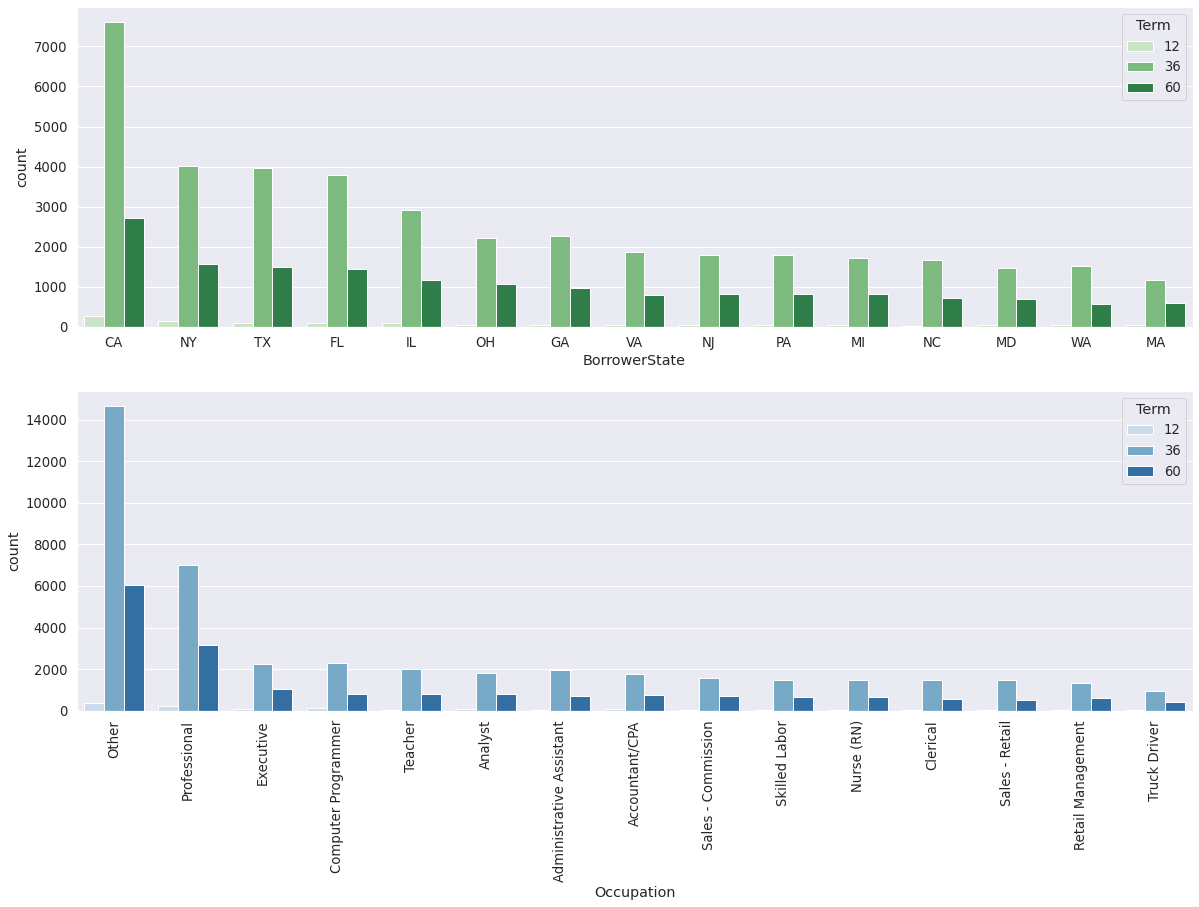

In [50]:
sns.set(font_scale=1.2)
plt.figure(figsize = [20, 20])


# subplot 1: Borrower State vs Term
plt.subplot(3, 1, 1)
sns.countplot(data = sub_loan_df, x = 'BorrowerState', hue = 'Term', palette = 'Greens',
            order= sub_loan_df.BorrowerState.value_counts().iloc[:15].index)


# subplot 1: Employment Status vs Term
 
plt.subplot(3, 1, 2)
sns.countplot(data = sub_loan_df, x = 'Occupation', hue = 'Term', palette = 'Blues',
            order= sub_loan_df.Occupation.value_counts().iloc[:15].index)
plt.xticks(rotation=90);


plt.show()

1.The first bar chart shows that California is the state where people get the loans the most.Most of the people get the loan for 36 months.<br>
2. The second bar chart shows that most of the people who get loans are from either professional or other occupation and loans for 36 months are preffered.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount,it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger. The Borrower APR decrease with higher Prosper rating. 

### Were there any interesting or surprising interactions between features?


A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.

In [51]:
# save the cleaned dataset for explanatory data analysis
sub_loan_df.to_csv('prosperLoanData_cleaned.csv')